<a href="https://colab.research.google.com/github/hanna-joo/project/blob/master/Seoul_Grand_Park_Guests/01_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 파일 설정
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
# 런타임 다시 시작하기

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf


In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

Text(0.3, 0.3, '한글')

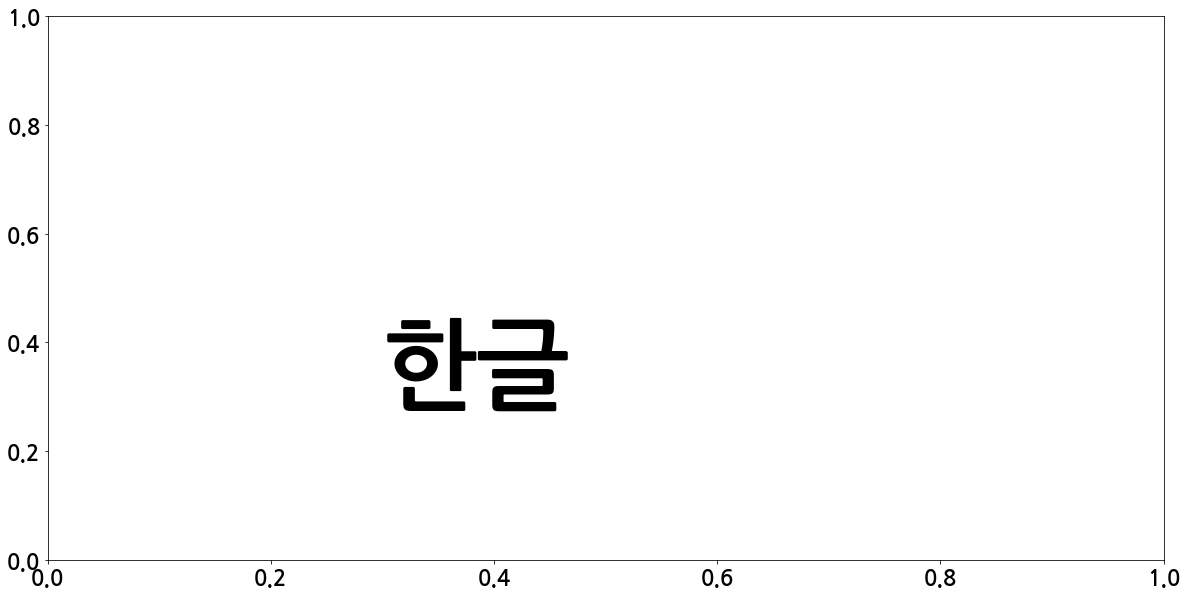

In [ ]:
font = {'family' : 'NanumGothic',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.text(0.3, 0.3, '한글', size=100)

In [ ]:
# 구글 드라이브 연동
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)       
          # print content of ROOT (Optional)
drive.mount(ROOT, force_remount=True)

/content/drive
Mounted at /content/drive


In [ ]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = '/content/drive/Shared drives/청년취업아카데미_대공원을간문돌이/데이터/'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

%cd "{PROJECT_PATH}"
%ls

/content/drive/Shared drives/청년취업아카데미_대공원을간문돌이/데이터
'1. 서울대공원 입장객 현황 (2005-2019).csv'   일별날씨.ipynb
 fine_dust_df.csv                             weather_df.csv


In [ ]:
seoul = pd.read_csv('1. 서울대공원 입장객 현황 (2005-2019).csv')
weather = pd.read_csv('weather_df.csv')
dust = pd.read_csv('fine_dust_df.csv')

len(seoul), len(weather),len(dust)

(5478, 5478, 5447)

In [ ]:
seoul.head()

,날짜,총계(명)
0,2005-01-01,"6,440"
1,2005-01-02,"6,062"
2,2005-01-03,858
3,2005-01-04,"1,200"
4,2005-01-05,"1,603"


In [ ]:
# 년, 월, 일 컬럼 나누기

seoul['year'] = 0
seoul['month'] = 0
seoul['date'] = 0
for i, x in enumerate(seoul['날짜']):
  a = x.split('-')
  seoul['year'][i] = a[0]
  seoul['month'][i] = a[1]
  seoul['date'][i] = a[2]

# 컬럼명 정리
seoul.columns = ['날짜','guests','year','month','date']
seoul = seoul[['날짜','year','month','date','guests']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# 결측치 처리를 위한 NULL값 보간

seoul.fillna(0, inplace=True)
seoul.isnull().sum()

# 데이터 핸들링을 위한 타입 변환

for i, j in enumerate(seoul['guests']):
  seoul['guests'][i] = str(j).replace(',','')

seoul['guests'] = pd.to_numeric(seoul['guests'])

seoul.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5478 non-null   object
 1   year    5478 non-null   int64 
 2   month   5478 non-null   int64 
 3   date    5478 non-null   int64 
 4   guests  5478 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 214.1+ KB


In [ ]:
seoul.head()

,날짜,year,month,date,guests
0,2005-01-01,2005,1,1,6440
1,2005-01-02,2005,1,2,6062
2,2005-01-03,2005,1,3,858
3,2005-01-04,2005,1,4,1200
4,2005-01-05,2005,1,5,1603


In [ ]:
del weather['Unnamed: 0']
weather.columns = ['날짜','highest','lowest','mean','rain']
weather.head()

,날짜,highest,lowest,mean,rain
0,2005-01-01,-1.0℃,-8.8℃,-4.9℃,-
1,2005-01-02,4.5℃,-5.0℃,0.4℃,0.0mm
2,2005-01-03,4.9℃,-2.0℃,2.9℃,1.5mm
3,2005-01-04,-1.2℃,-7.4℃,-4.9℃,-
4,2005-01-05,0.6℃,-8.8℃,-3.8℃,-


In [ ]:
del dust['Unnamed: 0']
dust.head()

,날짜,미세먼지
0,2005-01-01,-
1,2005-01-02,-
2,2005-01-03,-
3,2005-01-04,-
4,2005-01-05,-


In [ ]:
temp = pd.merge(seoul, weather, on='날짜')
temp.head()

,날짜,year,month,date,guests,highest,lowest,mean,rain
0,2005-01-01,2005,1,1,6440,-1.0℃,-8.8℃,-4.9℃,-
1,2005-01-02,2005,1,2,6062,4.5℃,-5.0℃,0.4℃,0.0mm
2,2005-01-03,2005,1,3,858,4.9℃,-2.0℃,2.9℃,1.5mm
3,2005-01-04,2005,1,4,1200,-1.2℃,-7.4℃,-4.9℃,-
4,2005-01-05,2005,1,5,1603,0.6℃,-8.8℃,-3.8℃,-


In [ ]:
len(temp)

5478

In [ ]:
df = pd.merge(temp, dust, on='날짜', how='outer')
df.head()

,날짜,year,month,date,guests,highest,lowest,mean,rain,미세먼지
0,2005-01-01,2005,1,1,6440,-1.0℃,-8.8℃,-4.9℃,-,-
1,2005-01-02,2005,1,2,6062,4.5℃,-5.0℃,0.4℃,0.0mm,-
2,2005-01-03,2005,1,3,858,4.9℃,-2.0℃,2.9℃,1.5mm,-
3,2005-01-04,2005,1,4,1200,-1.2℃,-7.4℃,-4.9℃,-,-
4,2005-01-05,2005,1,5,1603,0.6℃,-8.8℃,-3.8℃,-,-


In [ ]:
len(df)

5478

In [ ]:
# 2009.01.01. ~ 2009.01.31. 입장객 수 내부 전산 오류로 인한 누락
# 2005.10.01. ~ 2005.10.31. 에어코리아 10월 데이터 조회 불가로 인한 누락

df.isnull().sum()

날짜          0
year        0
month       0
date        0
guests      0
highest     0
lowest      0
mean        0
rain        0
미세먼지       31
dtype: int64

In [ ]:
df.to_csv('/content/drive/Shared drives/청년취업아카데미_대공원을간문돌이/데이터/seoulpark.csv')

In [ ]:
pd.read_csv('/content/drive/Shared drives/청년취업아카데미_대공원을간문돌이/데이터/seoulpark.csv', index_col=0).head()

,날짜,year,month,date,guests,highest,lowest,mean,rain,미세먼지
0,2005-01-01,2005,1,1,6440,-1.0℃,-8.8℃,-4.9℃,-,-
1,2005-01-02,2005,1,2,6062,4.5℃,-5.0℃,0.4℃,0.0mm,-
2,2005-01-03,2005,1,3,858,4.9℃,-2.0℃,2.9℃,1.5mm,-
3,2005-01-04,2005,1,4,1200,-1.2℃,-7.4℃,-4.9℃,-,-
4,2005-01-05,2005,1,5,1603,0.6℃,-8.8℃,-3.8℃,-,-
